# Examining Job Dissatisfaction In Queensland Education Institutes

This purpose of this project is to analyze exit surveys from two institutes, the Department of Education, Training, and Employment (DETE), and the Technical and Further Education (TAFE) insitute in Queensland, Australia. The data are available [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) from the government of Australia.

The questions stakeholders want answers to are:
Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? And:
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Set up

In [1]:
import pandas as pd
import numpy as np

### DETE Survey

In [2]:
#read in the data
dete_survey = pd.read_csv('dete_survey.csv')

print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The DETE dataset has 56 columns:

In [3]:
list(dete_survey.columns)

['ID',
 'SeparationType',
 'Cease Date',
 'DETE Start Date',
 'Role Start Date',
 'Position',
 'Classification',
 'Region',
 'Business Unit',
 'Employment Status',
 'Career move to public sector',
 'Career move to private sector',
 'Interpersonal conflicts',
 'Job dissatisfaction',
 'Dissatisfaction with the department',
 'Physical work environment',
 'Lack of recognition',
 'Lack of job security',
 'Work location',
 'Employment conditions',
 'Maternity/family',
 'Relocation',
 'Study/Travel',
 'Ill Health',
 'Traumatic incident',
 'Work life balance',
 'Workload',
 'None of the above',
 'Professional Development',
 'Opportunities for promotion',
 'Staff morale',
 'Workplace issue',
 'Physical environment',
 'Worklife balance',
 'Stress and pressure support',
 'Performance of supervisor',
 'Peer support',
 'Initiative',
 'Skills',
 'Coach',
 'Career Aspirations',
 'Feedback',
 'Further PD',
 'Communication',
 'My say',
 'Information',
 'Kept informed',
 'Wellness programs',
 'Health & 

Several columns have null values, and the final five columns have mostly null values:

In [4]:
#print number of null values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

We will mainly work with four columns:<br>
`ID`: An id used to identify the participant of the survey<br>
`SeparationType`: The reason why the person's employment ended<br>
`Cease Date`: The year or month the person's employment ended<br>
`DETE Start Date`: The year the person began employment with the DETE<br>
These columns have no null values.

In [5]:
#Examining the final five columns with many missing values:
print(dete_survey['Aboriginal'].value_counts())
print(dete_survey['Torres Strait'].value_counts())
print(dete_survey['South Sea'].value_counts())
print(dete_survey['Disability'].value_counts())
print(dete_survey['NESB'].value_counts())

Yes    16
Name: Aboriginal, dtype: int64
Yes    3
Name: Torres Strait, dtype: int64
Yes    7
Name: South Sea, dtype: int64
Yes    23
Name: Disability, dtype: int64
Yes    32
Name: NESB, dtype: int64


So, these five columns, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability`, and `NESB`, either have the response `Yes`, or have the value `NaN`. 

### TAFE Survey

In [6]:
#read in the data
tafe_survey = pd.read_csv('tafe_survey.csv')

print(tafe_survey.info())
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The TAFE dataset has 72 columns:

In [7]:
list(tafe_survey.columns)

['Record ID',
 'Institute',
 'WorkArea',
 'CESSATION YEAR',
 'Reason for ceasing employment',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'Main Factor. Which of these was the main factor for leaving?',
 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
 'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
 'InstituteViews. Topic:4. I was given adequate opport

The column names are very long, and contain a lot of repetition, punctuation, and sometimes the whole question. They need to be shortened and standardized. Some of them may not be relevant to our questions. 

In [8]:
#print number of null values
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


Here we are mainly interested in three columns:<br>
`Record ID`: An ID used to identify the participant of the survey<br>
`Reason for ceasing employment`: The reason why the person's employment ended<br>
`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years).
This last column has 106 missing values.

In [9]:
#print the number of each value in those 3 columns
print(tafe_survey['Record ID'].value_counts())
print(tafe_survey['Reason for ceasing employment'].value_counts())
print(tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts())

6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
               ..
6.348914e+17    1
6.342080e+17    1
6.349520e+17    1
6.342684e+17    1
6.341820e+17    1
Name: Record ID, Length: 702, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64
Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64


We want to compare the datasets, but the column names are completely different, and there are multiple places that indicate an employee was dissatisfied. 

## Data Cleaning

In the DETE dataset, make sure that `Not Stated` values are read in as `NaN` by reading in the data again:

In [10]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

### Dropping unnecessary columns

In the DETE survey, remove columns 28 through 49:

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In the TAFE survey, remove columns 17 through 66:

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Editing column names

In the DETE survey, column names have spaces and capitalizations:

In [13]:
list(dete_survey_updated.columns)

['ID',
 'SeparationType',
 'Cease Date',
 'DETE Start Date',
 'Role Start Date',
 'Position',
 'Classification',
 'Region',
 'Business Unit',
 'Employment Status',
 'Career move to public sector',
 'Career move to private sector',
 'Interpersonal conflicts',
 'Job dissatisfaction',
 'Dissatisfaction with the department',
 'Physical work environment',
 'Lack of recognition',
 'Lack of job security',
 'Work location',
 'Employment conditions',
 'Maternity/family',
 'Relocation',
 'Study/Travel',
 'Ill Health',
 'Traumatic incident',
 'Work life balance',
 'Workload',
 'None of the above',
 'Gender',
 'Age',
 'Aboriginal',
 'Torres Strait',
 'South Sea',
 'Disability',
 'NESB']

Make everything lowercase, remove trailing whitespace, and replace spaces with underscores:

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

Put an underscore in `separationtype`:

In [15]:
dete_survey_updated = dete_survey_updated.rename({'separationtype':'separation_type'}, axis=1)

Looking at the updated column names:

In [16]:
list(dete_survey_updated.columns)

['id',
 'separation_type',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb']

In the TAFE survey, update column names so that corresponding columns in the two datasets have the same name:

In [17]:
#create a dictionary to match the old and new column names
mapper = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separation_type', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

#rename the columns
tafe_survey_updated = tafe_survey_updated.rename(mapper, axis=1)
list(tafe_survey_updated.columns)

['id',
 'Institute',
 'WorkArea',
 'cease_date',
 'separation_type',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

### Selecting records of employees who resigned

In [18]:
dete_survey_updated.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Since our focus is on determining if employees are resigning due to dissatisfaction, we need to select only employees who resigned (from the `separation_type` column):

In [19]:
dete_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

There are three categories for resignation. We will select all of them:

In [20]:
#rewrites the column - don't run more than once
#cut strings at the dash, so that we are only left with 'Resignation'
dete_survey_updated['separation_type'] = dete_survey_updated['separation_type'].str.split('-').str[0]
dete_survey_updated['separation_type'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separation_type, dtype: int64

In [21]:
#copy the rows that have resignation as the separation type
dete_resignations = dete_survey_updated[dete_survey_updated['separation_type'] == 'Resignation'].copy()

In [22]:
dete_resignations.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


Now we have a new dataframe, `dete_resignations`, which only includes records of employees who resigned. Now repeating the process for the TAFE survey:

In [23]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Select only records of employees who resigned:

In [24]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'] == 'Resignation'].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Checking dates

Check the years in each dataset for inconsistencies: 

In [25]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

The years make sense. However, some rows include a month, but we only want the year.

In [26]:
#rewrites the column - don't run more than once
#cut strings at the "/" and keep the second part, the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[1]
dete_resignations['cease_date'].value_counts()

2013    72
2014    22
2012     3
2006     1
2010     1
Name: cease_date, dtype: int64

Now convert the column type to `float`:

In [27]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float64')
dete_resignations['cease_date'].value_counts()

2013.0    72
2014.0    22
2012.0     3
2006.0     1
2010.0     1
Name: cease_date, dtype: int64

(it still says int64, not float...)

Check the `dete_start_date` column for similar issues:

In [28]:
dete_resignations['dete_start_date'].value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

The earliest start date is in 1963, which is plausible. The most common start year is 2011. This column appears usable as-is. 

Checking the years in the TAFE dataset, which only has a `cease_date` column and no start date:

In [29]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The cease dates range from 2009-2013. There are much fewer records in 2009, possibly suggesting that data was not collected for the entire year. The DETE survey contained resignations from 2006 to 2014, with some years with no records. 

### Length of service

The TAFE survey already contains a length of service column, `institute_service`, in ranges:

In [30]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

For the DETE survey, I need to use the `dete_start_date` and  `cease_date` columns to calculate the years of service.

In [31]:
print(dete_resignations['dete_start_date'].head())
dete_resignations['cease_date'].head()

3     2005.0
5     1994.0
8     2009.0
9     1997.0
11    2009.0
Name: dete_start_date, dtype: float64


3     2012.0
5     2012.0
8     2012.0
9        NaN
11       NaN
Name: cease_date, dtype: float64

Create a new column, also called `institute_survey`, in `dete_resignations`, by subtracting the start date from the end date:

In [32]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [33]:
dete_resignations['institute_service'].value_counts()

3.0     10
9.0      9
2.0      7
0.0      7
1.0      5
7.0      4
6.0      4
5.0      4
15.0     4
8.0      3
17.0     3
4.0      3
10.0     3
20.0     2
12.0     2
22.0     2
13.0     2
25.0     2
18.0     2
14.0     2
23.0     1
19.0     1
31.0     1
11.0     1
28.0     1
30.0     1
21.0     1
27.0     1
42.0     1
29.0     1
16.0     1
39.0     1
34.0     1
24.0     1
Name: institute_service, dtype: int64

To compare to the TEFE survey column, we could re-label these years with the range they fall into. 

### Selecting for job dissatisfaction

In the TAFE survey, there are two columns indicating job dissatisfaction: `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction`. 

In [34]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

The `Contributing Factors. Dissatisfaction` column has the value `Contributing Factors. Dissatisfaction` to indicate dissatisfaction, and a dash otherwise. The `Contributing Factors. Job Dissatisfaction` is the same, except it has the value `Job Dissatisfaction`.

Replace the strings in the columns with only `True` for dissatisfaction, or `False` or `NaN`: 

In [35]:
#Create a function to replace the values
def update_vals(myval):
    if (pd.isnull(myval)):
        return np.nan
    elif (myval == '-'):
        return False
    else:
        return True    

Apply the function to change the values in the two columns indicating dissatisfaction:

In [36]:
mycols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[mycols] = tafe_resignations[mycols].applymap(update_vals)
tafe_resignations[mycols]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
...,...,...
696,False,False
697,False,False
698,False,False
699,False,False


We want to create one column that will indicate dissatisfaction. We will create a new column, `dissatisfied`, which will have the value `True` if either corresponding value in the two columns above is true. 

In [37]:
tafe_resignations['dissatisfied'] = tafe_resignations[mycols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied']

3      False
4      False
5      False
6      False
7      False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

Create a copy of the cleaned dataframe:

In [38]:
tafe_resignations_up = tafe_resignations.copy()

In the DETE survey, there are several columns indicating dissatisfaction:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

In [39]:
#create a list of the column names
detecols = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload',
]

#select those columns
dete_resignations[detecols]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,True,False


The columns already have Boolean values, so we can proceed to creating one column to indicate any dissatisfaction. It will be marked `True` if any of the columns above has a `True` value in that row.

In [40]:
dete_resignations['dissatisfied'] = dete_resignations[detecols].any(axis=1, skipna=False)
dete_resignations['dissatisfied']

3      False
5       True
8      False
9       True
11     False
       ...  
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

Make a copy of the dataframe:

In [41]:
dete_resignations_up = dete_resignations.copy()

### Combining the datasets

First, add a column that will identify which institute the survey came from:

In [42]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Combine the dataframes:

In [43]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation,NaN,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation,NaN,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,False,False,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,False,False,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,False,False,-,-,-,Other,-,1-2


Now the two dataframes have been concatonated, with a column identifying which dataset each row originated from.

### Grouping length of service

As mentioned above, the `institute_service` column indicates length of service. The TAFE survey values were in a range, while the DETE survey values were integers. We will reassign them all into new categories modified from [this Business Wire article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage):
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [44]:
print(combined['institute_service'].value_counts())
len(combined['institute_service'])

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
3.0                   10
9.0                    9
2.0                    7
0.0                    7
1.0                    5
5.0                    4
6.0                    4
7.0                    4
15.0                   4
17.0                   3
4.0                    3
8.0                    3
10.0                   3
14.0                   2
12.0                   2
13.0                   2
20.0                   2
22.0                   2
25.0                   2
18.0                   2
23.0                   1
28.0                   1
42.0                   1
39.0                   1
27.0                   1
24.0                   1
16.0                   1
34.0                   1
21.0                   1
11.0                   1
31.0                   1
19.0                   1
29.0                   1


651

Where there is a range of numbers, selecting the first number will place it in the correct new group of length of service.

In [45]:
#before selection
combined['institute_service']

0        7
1       18
2        3
3      NaN
4      NaN
      ... 
646    5-6
647    1-2
648    NaN
649    5-6
650    3-4
Name: institute_service, Length: 651, dtype: object

In [46]:
#use regex (regular expression) pattern r"(\d+)" to select any digit
combined['institute_service'] = (combined['institute_service'].astype('str').str.extract(r"(\d+)").astype('float'))
combined['institute_service'] 

0       7.0
1      18.0
2       3.0
3       NaN
4       NaN
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

Create a function that will sort values into the four categories listed above:

In [47]:
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif (val < 3):
        return 'New'
    elif (3 <= val < 7):
        return 'Experienced'
    elif (7 <= val < 11):
        return 'Established'
    else:
        return 'Veteran'

In [48]:
#apply the function
combined['service_cat'] = combined['institute_service'].apply(career_stage)
combined['service_cat']

0      Established
1          Veteran
2      Experienced
3              NaN
4              NaN
          ...     
646    Experienced
647            New
648            NaN
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object

We want to remove columns with less than 500 non-null values, except for `service_cat`. 

In [49]:
combined['service_cat'].value_counts(dropna=False)

NaN            267
New            156
Experienced    117
Veteran         71
Established     40
Name: service_cat, dtype: int64

In [50]:
156+117+71+40 #sum of non-null values

384

In [52]:
combined_test_updated = combined.dropna(axis='columns', thresh=500)
list(combined_test_updated.columns)

['id',
 'separation_type',
 'position',
 'employment_status',
 'gender',
 'age',
 'dissatisfied',
 'institute']

So we will only keep the 8 columns listed above, along with `service_cat`:

In [53]:
combined_updated = combined[['id',
                             'separation_type',
                             'position',
                             'employment_status',
                             'gender',
                             'age',
                             'dissatisfied',
                             'institute',
                             'service_cat']]
combined_updated.head()

,id,separation_type,position,employment_status,gender,age,dissatisfied,institute,service_cat
0,4.0,Resignation,Teacher,Permanent Full-time,Female,36-40,False,DETE,Established
1,6.0,Resignation,Guidance Officer,Permanent Full-time,Female,41-45,True,DETE,Veteran
2,9.0,Resignation,Teacher,Permanent Full-time,Female,31-35,False,DETE,Experienced
3,10.0,Resignation,Teacher Aide,Permanent Part-time,Female,46-50,True,DETE,NaN
4,12.0,Resignation,Teacher,Permanent Full-time,Male,31-35,False,DETE,NaN


The `institute_service` column had a variety of strings and integers representing the length of service. These have all now been sorted into four categories of employees, `New`, `Experienced`, `Veteran`, `Established`, in the new `service_cat` column. All other columns with less than 500 non-null values have been removed. 

### Examining job dissatisfaction

In [54]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Fill the null values with `False`:

In [55]:
combined_updated.loc[:, 'dissatisfied'].fillna(value=False, inplace=True)
#Try using loc like df.loc[:, 'col2'].fillna(df.col1, inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


False    411
True     240
Name: dissatisfied, dtype: int64

In [56]:
combined_updated['service_cat'].value_counts(dropna=False)

NaN            267
New            156
Experienced    117
Veteran         71
Established     40
Name: service_cat, dtype: int64

## Proportion of resignations due to dissatisfaction by length of service

To examine job dissatisfaction by length of service, we will make a pivot table giving the percentage of resignations due to dissatisfaction by each of the four length of service categories created above.

In [57]:
mypivottable = pd.pivot_table(combined_updated, values='dissatisfied', index=['service_cat'])
mypivottable

,dissatisfied
service_cat,
Established,0.450000
Experienced,0.273504
New,0.269231
Veteran,0.366197


Change order of the pivot table:

In [58]:
order = [2,1,0,3]
#create a dictionary and fill in the correct order:
mydata = {'dissatisfied':[]}
for i in order:
    mydata['dissatisfied'].append(mypivottable['dissatisfied'][i])

myindex = ['New', 'Experienced', 'Established', 'Veteran']    
mydf = pd.DataFrame(mydata, index=myindex) #convert to dataframe
mydf

,dissatisfied
New,0.269231
Experienced,0.273504
Established,0.450000
Veteran,0.366197


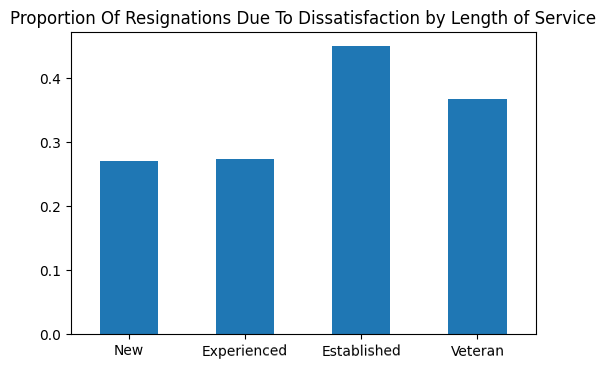

In [77]:
%matplotlib inline
mydf.plot(kind='bar', 
             title='Proportion Of Resignations Due To Dissatisfaction by Length of Service',
             legend=False,
             label='Career Stage',
             rot=0.5)

For these data, `1` represents 100% of the employees who have resigned. As established above, `New` employees have spent less than 3 years at the company, `Experienced` employees  have 3 to 6 years, `Established` ones have 7 to 10, and `Veteran` ones have more than 11 years experience at the company. The barplot shows that of the `Established` employees who left the job, 45% resigned to job dissatisfaction. `New` and `Experienced` employees who resigned were equally likely to give dissatisfaction as the reason (about 27%). `Veteran` employees were more likely to give dissatisfaction as their resignation reason (37%) than `New` and `Experienced` employees, but not as likely as `Established` ones. 

### Removing the rest of the missing values

In [60]:
print(len(combined_updated))
combined_updated.isnull().sum()

651


id                     0
separation_type        0
position              53
employment_status     54
gender                59
age                   55
dissatisfied           0
institute              0
service_cat          267
dtype: int64

In [61]:
#drop rows which contain missing values
combined_updated2 = combined_updated.dropna()

In [62]:
combined_updated2

,id,separation_type,position,employment_status,gender,age,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation,Teacher,Permanent Full-time,Female,36-40,False,DETE,Established
1,6.000000e+00,Resignation,Guidance Officer,Permanent Full-time,Female,41-45,True,DETE,Veteran
2,9.000000e+00,Resignation,Teacher,Permanent Full-time,Female,31-35,False,DETE,Experienced
204,5.580000e+02,Resignation,Teacher,Permanent Full-time,Female,21-25,True,DETE,New
205,5.630000e+02,Resignation,Cleaner,Permanent Part-time,Female,41-45,False,DETE,New
...,...,...,...,...,...,...,...,...,...
644,6.350599e+17,Resignation,Administration (AO),Temporary Full-time,Female,26 30,False,TAFE,New
646,6.350660e+17,Resignation,Operational (OO),Temporary Full-time,Male,21 25,False,TAFE,Experienced
647,6.350668e+17,Resignation,Teacher (including LVT),Temporary Full-time,Male,51-55,False,TAFE,New
649,6.350704e+17,Resignation,Teacher (including LVT),Permanent Full-time,Female,51-55,False,TAFE,Experienced


### Cleaning the age column

In [63]:
combined_updated2['age'].value_counts()

51-55            51
41  45           45
46  50           39
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
41-45            17
31-35            11
26-30            10
36-40            10
20 or younger     9
21-25             9
46-50             9
61 or older       7
56-60             6
Name: age, dtype: int64

Once again, the two datasets did not use the same conventions when describing age ranges. One aggregates all ages over 55, while the other combines all ages over 61. Other ages are grouped in ranges of 5 years. Some ranges have dashes and others just have spaces. First we will replace the spaces with dashes. 

#### Cleaning the age column: test

First, creating and experimenting on some test data:

In [64]:
#create data
mytestdata = {'age': ['51-55', '41 45', '41-45', '56-60', 
              '56 or older', '46 50', '61 or older', 
               '20 or younger'], 'institute': ['TAFE', 
                                               'TAFE', 'TAFE',
                                               'DETE', 'TAFE', 'TAFE',
                                               'DETE', 'TAFE']}
#make it a dataframe
mytestdf = pd.DataFrame(mytestdata)
mytestdf

,age,institute
0,51-55,TAFE
1,41 45,TAFE
2,41-45,TAFE
3,56-60,DETE
4,56 or older,TAFE
5,46 50,TAFE
6,61 or older,DETE
7,20 or younger,TAFE


Replace every space with a dash (unneccesary ones will be fixed later):

In [65]:
mytestdf['age'] = (mytestdf['age'].str.replace(" ", "-"))
mytestdf

,age,institute
0,51-55,TAFE
1,41-45,TAFE
2,41-45,TAFE
3,56-60,DETE
4,56-or-older,TAFE
5,46-50,TAFE
6,61-or-older,DETE
7,20-or-younger,TAFE


Create a function that will remove the dashes from the strings with words, and replace the variety of categories of people 56 and older with a single category, `56 and older`:

In [66]:
def agefunc(val):
    if (val == '56-or-older'):
        return '56 or older'
    elif (val == '56-60'):
        return '56 or older'
    elif (val == '61-or-older'):
        return '56 or older'
    elif (val == '20-or-younger'):
        return '20 or younger'
    else:
        return val

In [67]:
mytestdf['age_updated'] = mytestdf['age'].apply(agefunc)
mytestdf

,age,institute,age_updated
0,51-55,TAFE,51-55
1,41-45,TAFE,41-45
2,41-45,TAFE,41-45
3,56-60,DETE,56 or older
4,56-or-older,TAFE,56 or older
5,46-50,TAFE,46-50
6,61-or-older,DETE,56 or older
7,20-or-younger,TAFE,20 or younger


#### Cleaning the age column: real

Convert to a pandas dataframe so that the rest of the code works:

In [68]:
combined_updated_df = pd.DataFrame(combined_updated2)
combined_updated_df.head()

,id,separation_type,position,employment_status,gender,age,dissatisfied,institute,service_cat
0,4.0,Resignation,Teacher,Permanent Full-time,Female,36-40,False,DETE,Established
1,6.0,Resignation,Guidance Officer,Permanent Full-time,Female,41-45,True,DETE,Veteran
2,9.0,Resignation,Teacher,Permanent Full-time,Female,31-35,False,DETE,Experienced
204,558.0,Resignation,Teacher,Permanent Full-time,Female,21-25,True,DETE,New
205,563.0,Resignation,Cleaner,Permanent Part-time,Female,41-45,False,DETE,New


Replace every space with a dash (unneccesary ones will be fixed later):

In [69]:
combined_updated_df['age'] = (combined_updated_df['age'].str.replace(" ", "-")).str.replace("--", "-")
combined_updated_df['age']

0      36-40
1      41-45
2      31-35
204    21-25
205    41-45
       ...  
644    26-30
646    21-25
647    51-55
649    51-55
650    26-30
Name: age, Length: 381, dtype: object

Create a function that will remove the dashes from the strings with words, and replace the variety of categories of people 56 and older with a single category, `>55`:

In [70]:
def agefunc(val):
    if (val == '56-or-older'):
        return '>55'
    elif (val == '56-60'):
        return '>55'
    elif (val == '61-or-older'):
        return '>55'
    elif (val == '20-or-younger'):
        return '<21'
    else:
        return val
    #shortened categories to fit on the graph

Apply the function:

In [71]:
combined_updated_df['age_updated'] = combined_updated_df['age'].apply(agefunc)
combined_updated_df['age_updated'].value_counts()

41-45    62
51-55    51
46-50    48
31-35    43
>55      42
26-30    42
21-25    42
36-40    42
<21       9
Name: age_updated, dtype: int64

## Proportion of resignations due to dissatisfaction by age

Create a pivot table with the proportion of resignations due to dissatisfaction by age group:

In [72]:
pt_age = pd.pivot_table(combined_updated_df, values='dissatisfied', index=['age_updated'])
pt_age

,dissatisfied
age_updated,
21-25,0.285714
26-30,0.309524
31-35,0.348837
36-40,0.285714
41-45,0.306452
46-50,0.333333
51-55,0.333333
<21,0.222222
>55,0.285714


Fix the order:

In [73]:
order = [7,0,1,2,3,4,5,6,8]
#create a dictionary and fill in the correct order:
age_ordered = {'dissatisfied':[]}
for i in order:
    age_ordered['dissatisfied'].append(pt_age['dissatisfied'][i])

ageindex = ['<21','21-25','26-30','31-35','36-40','41-45',
            '46-50','51-55','>55']   
agedf = pd.DataFrame(age_ordered, index=ageindex) #convert to dataframe
agedf

,dissatisfied
<21,0.222222
21-25,0.285714
26-30,0.309524
31-35,0.348837
36-40,0.285714
41-45,0.306452
46-50,0.333333
51-55,0.333333
>55,0.285714


Plot the pivot table:

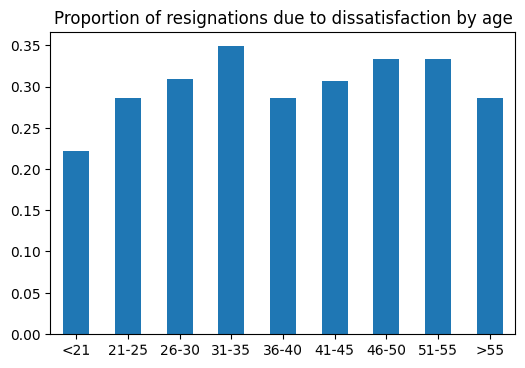

In [78]:
%matplotlib inline
agedf.plot(kind='bar', 
             title='Proportion of resignations due to dissatisfaction by age',
             legend=False,
             label='Age',
             rot=0.5)

The age group with the highest proportion of employees resigning due to dissatisfaction is 31- to 35-year-olds, with nearly 35% resigning due to dissatisfaction. 46- to 55-year-olds come close, with 33% resigning due to dissatisfaction (in both the 46-50 and 51-55 categories). The youngest category (21 and under) was least likely to give dissatisfaction as the reason for their resignation (only 22%).

## Comparing dissatisfaction between the DETE and TAFE surveys

Create a pivot table with the proportion of resignations due to dissatisfaction for each of the two surveys:

In [75]:
pt_inst = pd.pivot_table(combined_updated_df, values='dissatisfied', index=['institute'])
pt_inst

,dissatisfied
institute,
DETE,0.450549
TAFE,0.265517


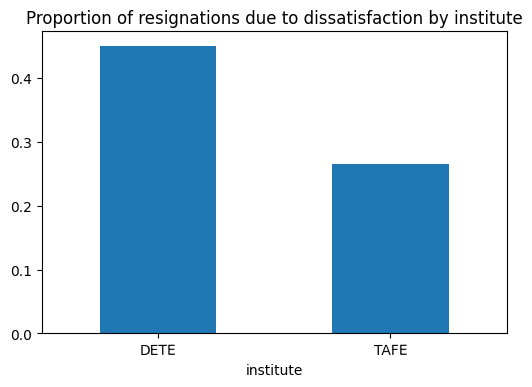

In [79]:
%matplotlib inline
pt_inst.plot(kind='bar', 
             title='Proportion of resignations due to dissatisfaction by institute',
             legend=False,
             label='Institute',
             rot=0.5)

Employees from the DETE institute were 1.7 times more likely to list dissatisfaction as the reason for their resignation than employees from the TAFE institute. 

## Conclusion

To restate, the questions stakeholders want answers to are:
Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? And:
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The first set of questions is answered by the first plot, `Proportion Of Resignations Due To Dissatisfaction by Length of Service`, shows that 45% of resigned employees with 7 to 10 years of experience (`Established` employees) listed some kind of dissatisfaction as the reason, more than any other length of service. `New` (less than 3 years experience) and `Experienced` employees (3 to 6 years experience) who resigned were equally likely to give dissatisfaction as the reason (about 27%). `Veteran` employees (more than 11 years experience) were more likely to give dissatisfaction as their resignation reason (37%) than `New` and `Experienced` employees, but not as likely as `Established` ones. 

The second set of questions is answered by the second plot, `Proportion of resignations due to dissatisfaction by age`. The youngest employees (21 and under) are least likely to give dissatisfaction as the reason for their resignation (only 22%). The age group with the highest proportion of employees resigning due to dissatisfaction is 31- to 35-year-olds, with nearly 35% resigning due to dissatisfaction. 46- to 55-year-olds come close, with 33% resigning due to dissatisfaction (in both the 46-50 and 51-55 categories).